# Taller: Distribuciones de probabilidad

## Ejercicio 1: Tiempo de Espera en una Parada de Autobús

En una parada de autobús, el tiempo de espera para el próximo autobús sigue una distribución exponencial con una tasa de llegada promedio de 4 autobuses por hora.

a) ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

b) Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

In [4]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

In [5]:
## Respuesta A

## Convertir minutos a horas
tiempo_minutos = 10
tiempo_horas = tiempo_minutos/60
lambda_p = 4



probabilidad = expon.cdf(tiempo_horas, scale=1/lambda_p)
print(f"Probabilidad de que un pasajero espere menos de 10 minutos: {probabilidad:.4f}")

Probabilidad de que un pasajero espere menos de 10 minutos: 0.4866


La probabilidad de que un pasajero espero menos de 10 minutos es del 48.66%

In [6]:
media = expon.mean(scale=1/4)
varianza = expon.var(scale=1/4)

print(f"Media del tiempo de espera: {media*60:.2f} minutos")
print(f"Varianza del tiempo de espera: {varianza*60**2:.2f} minutos^2")

Media del tiempo de espera: 15.00 minutos
Varianza del tiempo de espera: 225.00 minutos^2


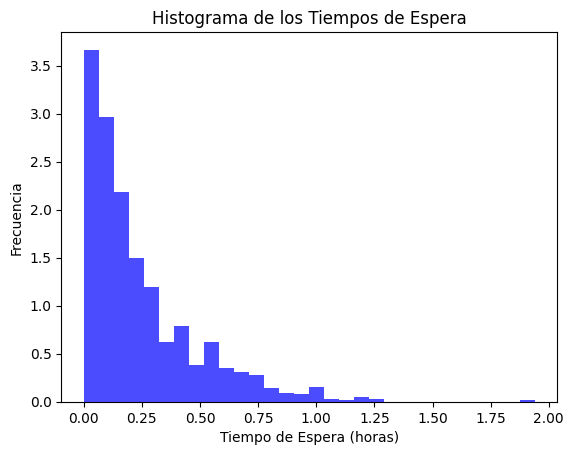

In [7]:
## Respuesta B

n_simulaciones = 1000
tiempos_espera = np.random.exponential(1 / lambda_p, n_simulaciones)

# Representación del histograma
plt.hist(tiempos_espera, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Tiempo de Espera (horas)')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Tiempos de Espera')
plt.show()

## Ejercicio 2: Puntuaciones en un Examen

Las puntuaciones de un examen siguen una distribución normal con una media de 70 y una desviación estándar de 8.

a) ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

b) Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

c) Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

In [8]:
from scipy.stats import norm

In [9]:
## RESPUESTA A
mu = 70
sigma = 8

# Sacar la probabilidad con la cdf de la distribución normal

p_65 = norm.cdf(65, loc = mu, scale = sigma)
p_85 = norm.cdf(85, loc = mu, scale = sigma)


probabilidad = p_85 - p_65
print(f"probabilidad de que un estudiante obtenga una puntuación entre 65 y 85: {probabilidad:.4f}")

probabilidad de que un estudiante obtenga una puntuación entre 65 y 85: 0.7036


In [10]:
## RESPUESTA B
#Para sacar la puntuación mínimo para aprobar con honores, sacamos el percentil 90

Percentil_90 = norm.ppf(0.90, loc = mu, scale = sigma)
print(f"La puntuación mínima para que un estudiante esté en el 10% superior es de: {Percentil_90:.4f}")


La puntuación mínima para que un estudiante esté en el 10% superior es de: 80.2524


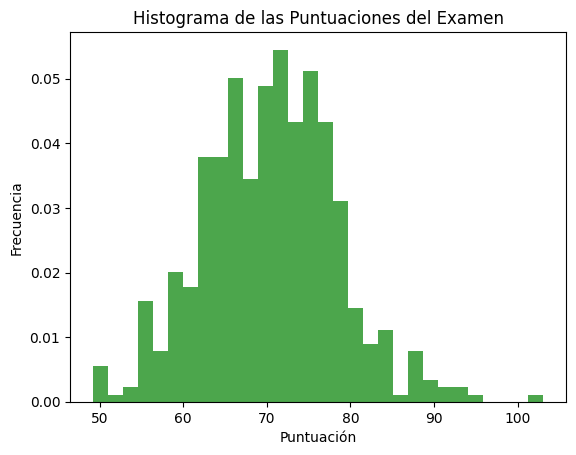

In [11]:
## Respuesta C
n_simulaciones = 500
puntuaciones = np.random.normal(loc=mu, scale=sigma, size=n_simulaciones)

# Representación del histograma
plt.hist(puntuaciones, bins=30, density=True, alpha=0.7, color='green')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.title('Histograma de las Puntuaciones del Examen')
plt.show()

## Ejercicio 3: Defectos en un Proceso de Manufactura

En una línea de producción, el número de defectos por metro de tela sigue una distribución de Poisson con una media de 2 defectos por metro.

a) ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

b) ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

c) Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

In [12]:
##RESPUESTA A
from scipy.stats import poisson
mu_poisson = 2
pro_1 = poisson.pmf(3, mu_poisson)
print(f"la probabilidad de encontrar exactamente 3 defectos en un metro de tela es de: {pro_1:.4f}")


la probabilidad de encontrar exactamente 3 defectos en un metro de tela es de: 0.1804


In [13]:
## RESPUESTA B

# Para calcular la probabilidad de que haya al menosun solo defecto, sacamos primero la probabilidad de que no haya nigún defecto, y eso se lo restamos a 1, 
# para sacar la probabilidad de tener al menos un defecto.

p_ninguno = poisson.pmf(0, mu_poisson)
p_almenos1 = 1 - p_ninguno
print(f"la probabilidad de encontrar al menos un defecto en un metro de tela es de: {p_almenos1:.4f}")


la probabilidad de encontrar al menos un defecto en un metro de tela es de: 0.8647


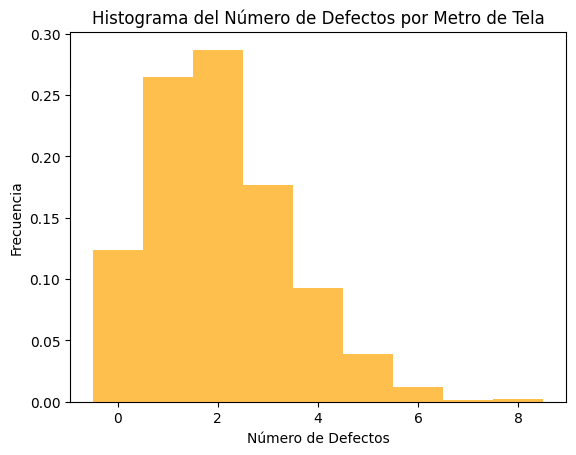

In [14]:
## RESPUESTA C

n_simulaciones = 1000
defectos_metro = np.random.poisson(mu_poisson, n_simulaciones)

# Representación del histograma
plt.hist(defectos_metro, bins=range(0, max(defectos_metro) + 2), density=True, alpha=0.7, color='orange', align='left')
plt.xlabel('Número de Defectos')
plt.ylabel('Frecuencia')
plt.title('Histograma del Número de Defectos por Metro de Tela')
plt.show()

## Ejercicio 4: Vida Útil de una Batería

La vida útil (en horas) de una batería sigue una distribución gamma con forma 
k=3 y escala 
θ=500 horas.

a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

b) Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

In [15]:
## RESPUESTA A

from scipy.stats import gamma
alpha = 3
beta = 500
# Primero sacamos la densidad acumulada en 1500, y se lo restamos a 1 para saber la probabilidad de que dure más de 1500 horas
p_1500 = gamma.cdf(1500, a = alpha, scale = beta)
p_mayor_1500 = 1-p_1500
print(f"la probabilidad de que una batería dure más de 1500 horas es de: {p_mayor_1500:.4f}")


la probabilidad de que una batería dure más de 1500 horas es de: 0.4232


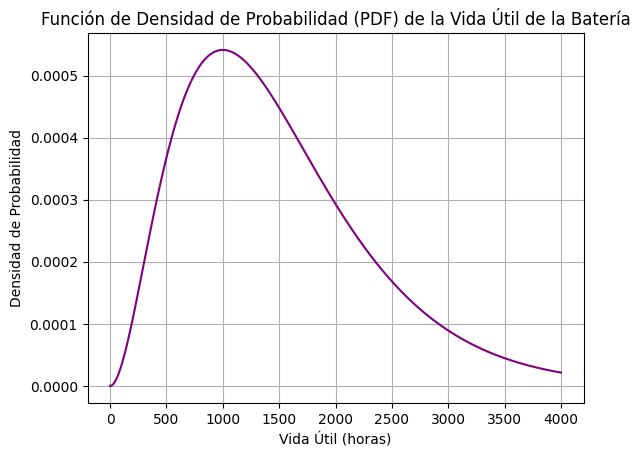

In [16]:
## RESPUESTA B

x = np.linspace(0, 4000, 1000)  # Valores de x para calcular la PDF
pdf_values = gamma.pdf(x, a=alpha, scale=beta)

# Representación de la PDF
plt.plot(x, pdf_values, color='purple')
plt.xlabel('Vida Útil (horas)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Función de Densidad de Probabilidad (PDF) de la Vida Útil de la Batería')
plt.grid()
plt.show()

## Ejercicio 5: Lluvias en una Región

El número de días de lluvia en un mes en una región sigue una distribución binomial con 
n=30 días y una probabilidad diaria de lluvia de 
p=0.2.

a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?

b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

In [17]:
## RESPUESTA A
from scipy.stats import binom
n = 30
p = 0.2
p_8 = binom.pmf(8, n, p)
print(f"la probabilidad de que llueva exactamente 8 días en un mes es de: {p_8:.4f}")




la probabilidad de que llueva exactamente 8 días en un mes es de: 0.1106


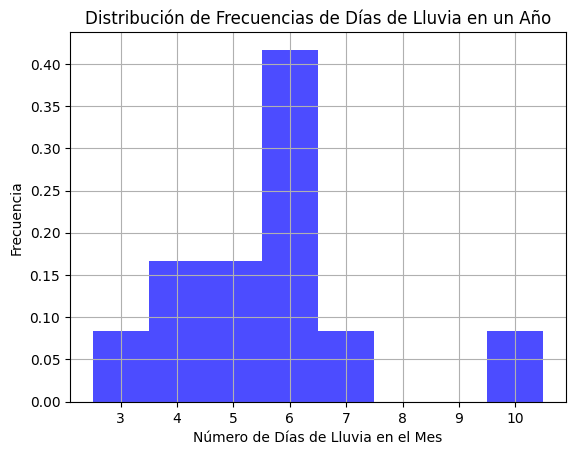

In [18]:
## RESPUESTA B

n_meses = 12
dias_por_mes = np.random.binomial(n, p, n_meses)

# Representación de la distribución de frecuencias
plt.hist(dias_por_mes, bins=range(min(dias_por_mes), max(dias_por_mes) + 2), 
         density=True, alpha=0.7, color='blue', align='left')
plt.xlabel('Número de Días de Lluvia en el Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Frecuencias de Días de Lluvia en un Año')
plt.grid()
plt.show()

## Ejercicio 6: Control de Calidad en una Fábrica de Bombillas
Una fábrica produce bombillas que, según especificaciones, tienen una vida útil que sigue una distribución normal con una media de 800 horas y una desviación estándar de 50 horas. Un ingeniero sospecha que una nueva máquina está produciendo bombillas con una vida útil diferente. Para comprobarlo, toma una muestra aleatoria de 36 bombillas producidas por la nueva máquina y encuentra que la vida útil media es de 785 horas.

a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.

b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.

c) Calcule el valor p de la prueba.

d) ¿Cuál es su conclusión respecto a la nueva máquina?

## RESPUESTA A
### Planteamiento de las Hipótesis

$$H_0 : \mu = 800$$

$$H_1 : \mu \neq 800$$

### Estadístico de Prueba

El estadístico de prueba se calcula utilizando la siguiente fórmula para la distribución normal:

$$
z = \cfrac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
$$

Sustituyendo los valores dados:

$$
z = \cfrac{785 - 800}{\frac{50}{\sqrt{36}}}
$$



In [19]:
# RESPUESTA B
# Nivel de significancia del 5% y valores críticos
alpha = 0.05

# Valores críticos para una prueba bilateral (alfa/2 en cada cola)
z_critical = norm.ppf(1 - alpha / 2)

z_critical

np.float64(1.959963984540054)

In [20]:
#RESPUESTA C

# Datos del problema
mu_0 = 800  # media poblacional según la hipótesis nula
sigma = 50  # desviación estándar poblacional
n = 36  # tamaño de la muestra
x_bar = 785  # media muestral
alpha = 0.05  # nivel de significancia



z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Mostrar el valor del estadístico Z
print(f"Valor del estadístico Z: {z:.4f}")

# Parte c: Calcular el valor p de la prueba
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"Valor p: {p_value:.4f}")

Valor del estadístico Z: -1.8000
Valor p: 0.0719


#### El valor del estadístico Z no cae en las áreas críticas, lo cual indica que no rechazamos la hipótesis nula. Esto significa que no hay suficiente evidencia para concluir que la vida útil de las bombillas es diferente a la media especificada de 800 horas

## Ejercicio 7: Efectividad de un Nuevo Medicamento

Un laboratorio farmacéutico ha desarrollado un nuevo medicamento para reducir la presión arterial. Se sabe que la presión arterial sistólica de la población sigue una distribución normal con una media de 120 mmHg y una desviación estándar de 15 mmHg. Se administra el nuevo medicamento a una muestra de 25 pacientes, y se observa que la presión arterial media es de 112 mmHg.

a) Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

c) Calcule el valor p de la prueba.

d) Interprete los resultados y determine si el medicamento es efectivo.

## RESPUESTA A
### Planteamiento de las Hipótesis

$$H_0 : \mu = 120$$

$$H_1 : \mu < 120$$

### Estadístico de Prueba

El estadístico de prueba se calcula utilizando la siguiente fórmula para la distribución normal:

$$
z = \cfrac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
$$

Sustituyendo los valores dados:

$$
z = \cfrac{112 - 120}{\frac{15}{\sqrt{25}}}
$$


In [21]:
# RESPUESTA B
# Nivel de significancia del 1% y valores críticos
alpha = 0.01

# Valores críticos para una prueba unilateral a la izquierda
z_critical = norm.ppf(1 - alpha)

z_critical

np.float64(2.3263478740408408)

In [22]:
#RESPUESTA C

# Datos del problema
mu_0 = 120  # media poblacional según la hipótesis nula
sigma = 15  # desviación estándar poblacional
n = 25  # tamaño de la muestra
x_bar = 112  # media muestral
alpha = 0.01  # nivel de significancia



z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Mostrar el valor del estadístico Z
print(f"Valor del estadístico Z: {z:.4f}")

# Parte c: Calcular el valor p de la prueba
p_value = 1 - norm.cdf(abs(z))
print(f"Valor p: {p_value:.4f}")

Valor del estadístico Z: -2.6667
Valor p: 0.0038


### Debido a que el valor p es menor al nivel de significancia, y el valor absoluto del z critical es menor al z estadístico, hay evidencia suficiente para rechazar la hipótesis nula. 

## Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

El número de llamadas que recibe un centro de atención al cliente sigue una distribución de Poisson con una media de 5 llamadas por minuto. El gerente implementa un nuevo sistema y desea saber si ha afectado la tasa de llamadas. Durante un periodo de 30 minutos, registra un total de 180 llamadas.

a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.



### Planteamiento de las Hipótesis para el Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

#### **Respuesta A**

### Planteamiento de las Hipótesis

$$H_0 : \lambda = 5$$

$$H_1 : \lambda \neq 5$$

### Estadístico de Prueba

El estadístico de prueba para una **distribución de Poisson** se calcula utilizando la aproximación normal cuando el tamaño de la muestra es lo suficientemente grande. En este caso, se asume que la media de las llamadas sigue una **distribución normal** con media \(\lambda n\) y desviación estándar \(\sqrt{\lambda n}\), donde \(n\) es el tiempo en minutos.

El estadístico Z se calcula como:

$$
z = \cfrac{X - \lambda_0 n}{\sqrt{\lambda_0 n}}
$$

Sustituyendo los valores dados:

- \(\lambda_0 = 5\) (media poblacional según la hipótesis nula).
- \(n = 30\) (tiempo de observación en minutos).
- \(X = 180\) (número total de llamadas registradas).

Por lo tanto:

$$
z = \cfrac{180 - 5 \times 30}{\sqrt{5 \times 30}}
$$

In [23]:
# RESPUESTA B
# Nivel de significancia del 5% y valores críticos
alpha = 0.05

# Valores críticos para una prueba bilateral
z_critical = norm.ppf(1 - alpha/2)

z_critical

np.float64(1.959963984540054)

In [24]:
# RESPUESTA C

# Datos del problema
lambda_0 = 5  # media poblacional según la hipótesis nula (tasa de llamadas)
n = 30  # tiempo de observación en minutos
X = 180  # número total de llamadas registradas
alpha = 0.05  # nivel de significancia

# Calcular el estadístico Z
z = (X - lambda_0 * n) / np.sqrt(lambda_0 * n)

# Mostrar el valor del estadístico Z
print(f"Valor del estadístico Z: {z:.2f}")

# Parte c: Calcular el valor p de la prueba
# Como es una prueba bilateral, multiplicamos por 2 la probabilidad de la cola correspondiente
p_value = 2 * (1 - norm.cdf(abs(z)))

# Mostrar el valor p
print(f"Valor p: {p_value:.4f}")

Valor del estadístico Z: 2.45
Valor p: 0.0143


Hay suficiente evidencia para concluir que el nuevo sistema ha cambiado la tasa de llamadas del centro de atención al cliente, re rechaza la hipótesis nula

## Ejercicio 9: Preferencia de Marca

Una empresa desea saber si la proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitaria. Antes de la campaña, el 40% de los clientes prefería su marca. Después de la campaña, en una muestra de 200 clientes, 100 indican preferir su marca.

a) Establezca las hipótesis nula y alternativa.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.



#### **Respuesta A**
Número de consumidores encuestados: $200$

Número de consumidores que prefieren el nuevo sabor: $100$

Proporción de preferencia muestral: $\hat{p} = \cfrac{100}{200} = 0.50 $

Proporción de preferencia inicial: $0.40 $

Nivel de significancia $\alpha = 0.05$


### Planteamiento de las hipótesis

$$H_0 : p_0 \leq 40$$

$$H_1 : p_0 > 40$$



In [25]:
# RESPUESTA B
# Nivel de significancia del 5% y valores críticos
alpha = 0.05

# Valores críticos para una prueba bilateral
z_critical = norm.ppf(1 - alpha)

z_critical

np.float64(1.6448536269514722)

In [26]:


import numpy as np
from scipy.stats import norm

z = (0.50-0.40)/np.sqrt(0.4*(1-0.4)/200)

z

np.float64(2.886751345948128)

In [27]:
# RESPUESTA C

p_valor=norm.sf(z, 0, 1) # Es de cola superior
p_valor

np.float64(0.0019462085613893183)

Dado que el p valor es menor que el nivel de significancia, y el z estadístico está en la zona de rechazo. Hay suficiente evidencia para rechazar la hiótesis nula.

## Ejercicio 10: Evaluación de un Programa Educativo


Una escuela implementa un nuevo programa educativo y quiere evaluar su efectividad en las calificaciones de matemáticas. Históricamente, las calificaciones siguen una distribución normal con una media de 70 y una desviación estándar de 10. Después de implementar el programa, una muestra de 50 estudiantes tiene una calificación media de 73.

a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.

b) Utilice un nivel de significancia del 2% para realizar la prueba.

c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?



## Respuesta A
Muestra de estudiantes: $50$

Media muestral: $\bar{x} = 73$

Media inicial: $70$

Desviación estándar: $\sigma = 10$

Nivel de significancia $\alpha = 0.02$

### Planteamiento de las hipótesis

$$H_0 : \mu \leq 70$$

$$H_1 : \mu > 70$$

In [29]:
## Respuesta B
# Cálculo del valor crítico de z para una cola con α = 0.02
alpha = 0.02
z_critical = norm.ppf(1 - alpha)
z_critical


np.float64(2.0537489106318225)

In [33]:
## Respuesta C

### Calculamos el valor de Z estadístico

# Datos del problema
n = 50  # Tamaño de la muestra
mu_0 = 70  # Media histórica
sigma = 10  # Desviación estándar
x_bar = 73  # Media de la muestra

# Cálculo del estadístico z
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

z






np.float64(2.121320343559643)

In [35]:
### Calculamos el p valor

p = 1 - norm.cdf(z)
p

np.float64(0.01694742676234462)

Como el valor del estadístico 
𝑧
z cae dentro de la región de rechazo, podemos concluir que hay suficiente evidencia para rechazar la hipótesis nula

### Ejercicio 11: Efectividad de dos métodos de enseñanza

Un investigador educativo quiere comparar la efectividad de dos métodos de enseñanza diferentes en el rendimiento de los estudiantes. Se seleccionan aleatoriamente 30 estudiantes y se dividen en dos grupos de 15 estudiantes cada uno. El primer grupo es enseñado con el método tradicional y el segundo grupo con el nuevo método. Después de un mes, se les aplica un examen estandarizado.

Grupo 1 (Método Tradicional): Media = 75, Desviación estándar = 8
Grupo 2 (Nuevo Método): Media = 80, Desviación estándar = 6
a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.

b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.

c) Interprete los resultados y concluya si el nuevo método es más efectivo.





### Formulación de las hipótesis

Muestra de estudiantes: $30$

Media grupo 1 (Método Tradicional): $\bar{x_1} = 75$

Media grupo 2 (Nuevo Método): $\bar{x_2} = 80$

Desviación estándar grupo 1: $\sigma_1 = 8$

Desviación estándar grupo 2: $\sigma_2 = 6$

Nivel de significancia: $\alpha = 0.05$

### Planteamiento de las hipótesis

$$H_0 : \mu_1 = \mu_2$$

$$H_1 : \mu_1 \neq \mu_2$$


In [4]:
### RESPUESTA B
import numpy as np

# Datos
media_grupo1 = 75
media_grupo2 = 80
desviacion_grupo1 = 8
desviacion_grupo2 = 6
n_grupo1 = 15
n_grupo2 = 15

# Calcular la diferencia entre medias
diferencia_medias = media_grupo1 - media_grupo2

# Calcular la parte del denominador
denominador = np.sqrt((desviacion_grupo1**2 / n_grupo1) + (desviacion_grupo2**2 / n_grupo2))

# Calcular el estadístico t
t_stat = diferencia_medias / denominador

# Calcular grados de libertad
df = n_grupo1 + n_grupo2 - 2

# Valor crítico para 28 grados de libertad y alfa = 0.05 (bilateral)
valor_critico = 2.048

# Mostrar resultados
print(f'Estadístico t: {t_stat:.2f}')
print(f'Grados de libertad: {df}')
print(f'Valor crítico de t: ±{valor_critico}')



Estadístico t: -1.94
Grados de libertad: 28
Valor crítico de t: ±2.048


#### RESPUESTA C


Debido a que el valor de t estadístico es menor al valor crítico de t, este no se encuentra en la zona de rechazo, por lo que no tenemos evidencia suficiente para rechazar la hipótesis nula. No podemos concluir que el nuevo método es más efectivo.




### Ejercicio 12: Efecto de un programa de ejercicio en la presión arterial

Un médico quiere evaluar si un programa de ejercicio regular reduce la presión arterial sistólica en pacientes hipertensos. Se mide la presión arterial de 20 pacientes antes y después de participar en el programa durante 8 semanas.

Presión arterial media antes: 150 mmHg
Presión arterial media después: 140 mmHg
Desviación estándar de las diferencias: 10 mmHg
a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.

c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?



### Formulación de las hipótesis

Muestra de pacientes: $20$

Media antes: $\bar{x_1} = 150$

Media después: $\bar{x_2} = 140$

Desviación estándar de las diferencias: $\sigma_d = 8$


Nivel de significancia: $\alpha = 0.01$

### Planteamiento de las hipótesis

$$H_0 : \mu_Despues \geq \mu_Antes$$

$$H_1 : \mu_Despues \ < \mu_Antes$$

In [5]:
### RESPUESTA B

from scipy import stats
import numpy as np

# Datos
presion_antes = 150
presion_despues = 140
desviacion_diferencias = 10
n = 20
nivel_significancia = 0.01

# Media de las diferencias
diferencia_media = presion_antes - presion_despues

# Estadístico t para muestras relacionadas
t_stat = diferencia_media / (desviacion_diferencias / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor crítico para una cola (nivel de significancia 0.01)
t_critico = stats.t.ppf(1 - nivel_significancia, df)

# Resultados
print(f'Estadístico t: {t_stat:.2f}')
print(f'Valor crítico de t: {t_critico:.2f}')



Estadístico t: 4.47
Valor crítico de t: 2.54


### RESPUESTA C

Debido a que el valor estadístico de t es mayor al valor crítico de t, este se encuentra en la zona de rechazo, por lo que hay evidencia suficiente para rechazar lo hipótesis nula. El programa de ejercicio si es efectivo para disminuir la presión arterial

### Ejercicio 13: Comparación de salarios entre dos departamentos

En una empresa, se quiere saber si existe una diferencia en los salarios promedio entre el departamento de ventas y el departamento de marketing. Se toman muestras aleatorias de empleados de ambos departamentos.

Ventas (n = 25): Media = $50,000, Desviación estándar = $5,000
Marketing (n = 30): Media = $52,000, Desviación estándar = $6,000
a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.

b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.

c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

### Formulación de las hipótesis

Muestra de ventas: $25$

Muestra de marketing: $30$

Media ventas: $\bar{x_1} = 50000$

Media marketing: $\bar{x_2} = 52000$

Desviación estándar ventas: $\sigma_v = 5000$

Desviación estándar marketing: $\sigma_m = 6000$

Nivel de significancia: $\alpha = 0.05$

### Planteamiento de las hipótesis

$$H_0 : \mu_v = \mu_m$$

$$H_1 : \mu_v \neq \mu_m$$

In [7]:
### RESPUESTA B

### RESPUESTA B
import numpy as np
from scipy import stats
# Datos
media_ventas = 50000
media_marketing = 52000
desviacion_ventas = 5000
desviacion_marketing = 6000
n_ventas = 25
n_marketing = 30
alpha = 0.05
# Calcular la diferencia entre medias
diferencia_medias = media_ventas - media_marketing

# Calcular la parte del denominador
denominador = np.sqrt((desviacion_ventas**2 / n_ventas) + (desviacion_marketing**2 / n_marketing))

# Calcular el estadístico t
t_stat = diferencia_medias / denominador

# Calcular grados de libertad
df = n_ventas + n_marketing - 2

# Valor crítico para 28 grados de libertad y alfa = 0.05 (bilateral)
valor_critico = stats.t.ppf(1 - alpha/2, df)

# Mostrar resultados
print(f'Estadístico t: {t_stat:.2f}')
print(f'Grados de libertad: {df}')
print(f'Valor crítico de t: ±{valor_critico}')



Estadístico t: -1.35
Grados de libertad: 53
Valor crítico de t: ±2.0057459953178687


### RESPUESTA C

Debido a que el t estadístico es menor que el valor crítico de t, no hay suficiente evidencia para rechazar la hiótesis nula, por lo que no hay una diferencia significativa entre los salarios de los dos departamentos.


### Ejercicio 14: Asociación entre Género y Preferencia de Producto (Prueba Chi-cuadrado)

Una empresa desea saber si existe una asociación entre el género de los consumidores y su preferencia por tres tipos de productos: A, B y C. Se realiza una encuesta a 200 personas y se obtienen los siguientes resultados:

Producto A	Producto B	Producto C	Total
Hombres	40	30	20	90
Mujeres	20	50	40	110
Total	60	80	60	200



a) Formule las hipótesis nula y alternativa para determinar si hay una asociación significativa entre el género y la preferencia de producto.

b) Realice una prueba chi-cuadrado de independencia al nivel de significancia del 5%.

c) Interprete los resultados y concluya si existe una asociación significativa entre el género y la preferencia de producto.

### Planteamiento de las hipótesis

#### Hipótesis nula (H₀):
No hay una asociación significativa entre el género y la preferencia de producto, es decir, son independientes.

$$
H_0: \text{El género y la preferencia de producto son independientes.}
$$

#### Hipótesis alternativa (H₁):
Existe una asociación significativa entre el género y la preferencia de producto, es decir, no son independientes.

$$
H_1: \text{El género y la preferencia de producto no son independientes.}
$$


In [9]:
### RESPUESTA B

import numpy as np
from scipy import stats
from scipy.stats import chi2

# Tabla de contingencia (observada)
observed = np.array([[40, 30, 20], [20, 50, 40]])

# Realizar la prueba chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(observed)

# Nivel de significancia
alpha = 0.05

# Calcular el valor crítico usando la función chi2.ppf
valor_critico = chi2.ppf(1 - alpha, dof)

# Mostrar resultados
print(f'Estadístico chi-cuadrado: {chi2_stat:.2f}')
print(f'Valor p: {p_val:.4f}')
print(f'Grados de libertad: {dof}')
print(f'Valor crítico de chi-cuadrado (α = 0.05): {valor_critico:.2f}')
print('Frecuencias esperadas:')
print(expected)

Estadístico chi-cuadrado: 16.50
Valor p: 0.0003
Grados de libertad: 2
Valor crítico de chi-cuadrado (α = 0.05): 5.99
Frecuencias esperadas:
[[27. 36. 27.]
 [33. 44. 33.]]


##### RESPUESTA C

Debido a que el valor crítico de chi-cuadrado es menor al estadístico chi-cuadrado, hay suficiente evidencia para concluir que si existe una asociación significativa entre el género y la preferencia de producto.

### Ejercicio 15: Comparación de Varianzas entre Dos Procesos de Producción (Prueba F)

Una fábrica tiene dos máquinas, Máquina 1 y Máquina 2, que producen el mismo componente. Se sospecha que hay diferencias en la consistencia (variabilidad) de las piezas producidas por cada máquina. Para evaluar esto, se toman muestras aleatorias de las dimensiones de las piezas producidas por cada máquina.

Máquina 1: n = 20, Varianza muestral = 1.5 mm²
Máquina 2: n = 25, Varianza muestral = 0.9 mm²
a) Establezca las hipótesis nula y alternativa para determinar si las varianzas de los dos procesos son significativamente diferentes.

b) Realice una prueba F al nivel de significancia del 5% para comparar las varianzas.

c) Concluya si hay diferencias significativas en la variabilidad de las piezas producidas por las dos máquinas.

### RESPUESTA A

### Planteamiento de las hipótesis

#### Hipótesis nula (H₀):
Las varianzas de las dos máquinas son iguales, es decir, no hay diferencia significativa en la variabilidad de las piezas producidas.

$$
H_0: \sigma_1^2 = \sigma_2^2
$$

#### Hipótesis alternativa (H₁):
Las varianzas de las dos máquinas son diferentes, es decir, hay una diferencia significativa en la variabilidad de las piezas producidas.

$$
H_1: \sigma_1^2 \neq \sigma_2^2
$$


In [10]:
from scipy.stats import f

# Datos del ejercicio
varianza_m1 = 1.5  # Varianza de la Máquina 1
varianza_m2 = 0.9  # Varianza de la Máquina 2
n1 = 20  # Tamaño de la muestra de la Máquina 1
n2 = 25  # Tamaño de la muestra de la Máquina 2

# Calcular el estadístico F
F_stat = varianza_m1 / varianza_m2

# Grados de libertad
df1 = n1 - 1  # Grados de libertad para Máquina 1
df2 = n2 - 1  # Grados de libertad para Máquina 2

# Nivel de significancia
alpha = 0.05

# Calcular los valores críticos para una prueba bilateral (dividimos el nivel de significancia en dos colas)
valor_critico_superior = f.ppf(1 - alpha / 2, df1, df2)
valor_critico_inferior = f.ppf(alpha / 2, df1, df2)

# Mostrar los resultados
print(f'Estadístico F calculado: {F_stat:.4f}')
print(f'Valor crítico superior (α/2 = 0.025): {valor_critico_superior:.4f}')
print(f'Valor crítico inferior (α/2 = 0.025): {valor_critico_inferior:.4f}')

Estadístico F calculado: 1.6667
Valor crítico superior (α/2 = 0.025): 2.3452
Valor crítico inferior (α/2 = 0.025): 0.4078


### RESPUESTA C

El valor calculado de F (1.67) está dentro del rango de aceptación 
[0.41,2.35], es decir, no supera el valor crítico superior ni cae por debajo del valor crítico inferior.
Por esta razón no podemos rechazar la hipótesis nula. 